In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression

# 1. Initialize Spark
spark = SparkSession.builder.appName("IncomePrediction").getOrCreate()

# 2. Load data
cols = ["age","workclass","fnlwgt","education","education_num","marital_status",
        "occupation","relationship","race","sex","capital_gain","capital_loss",
        "hours_per_week","native_country","income"]
df = spark.read.csv("data/adult.data", header=False, inferSchema=True).toDF(*cols)

In [7]:
sample = df.sample(False, 0.1, seed=1).toPandas()

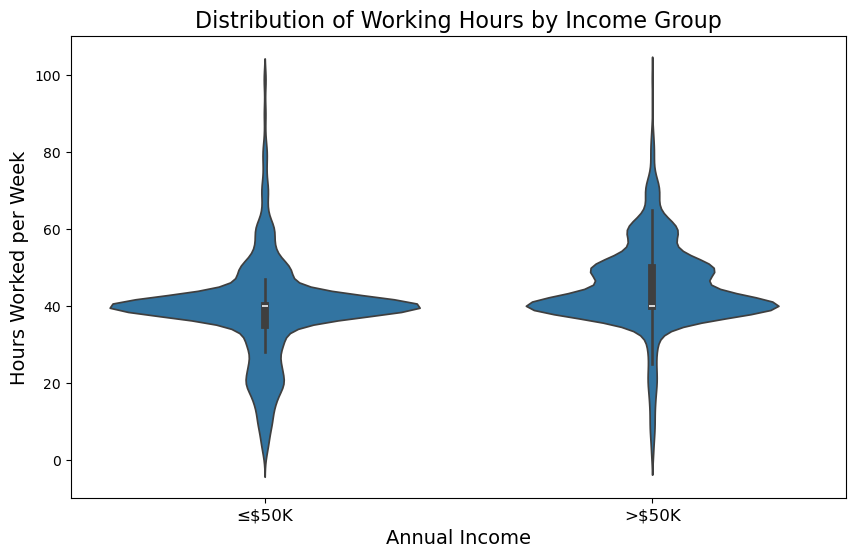

In [12]:
# Better violin plot with clearer labels
import seaborn as sns, matplotlib.pyplot as plt

# Create figure with larger size for better readability
plt.figure(figsize=(10, 6))

# Create violin plot with custom order
sns.violinplot(x="income", y="hours_per_week", data=sample)

# Improve axis labels and add title
plt.xlabel('Annual Income', size=14)
plt.ylabel('Hours Worked per Week', size=14)
plt.title('Distribution of Working Hours by Income Group', size=16)

# Rename x-axis tick labels to be more readable
plt.xticks([0, 1], ['≤$50K', '>$50K'], size=12)

plt.show()


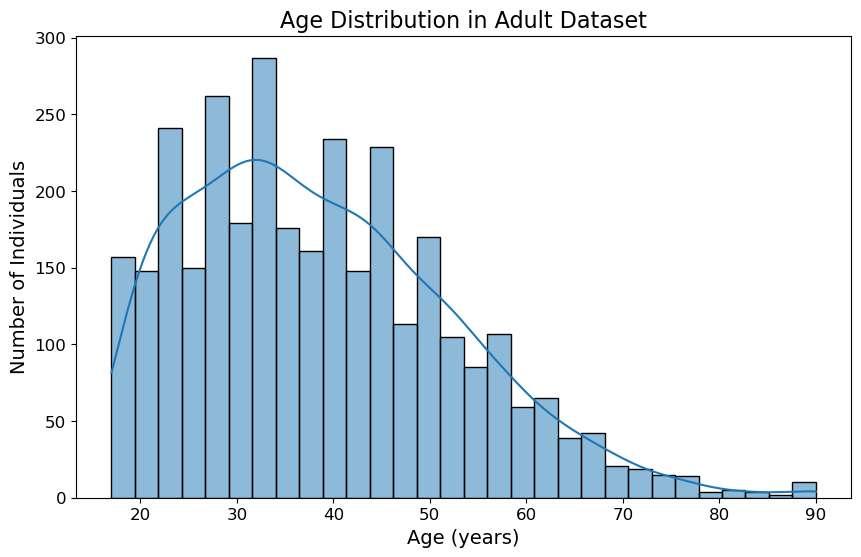

In [13]:
# Better histogram with improved readability
plt.figure(figsize=(10, 6))

sns.histplot(sample.age, kde=True, bins=30)

plt.xlabel('Age (years)', size=14)
plt.ylabel('Number of Individuals', size=14)
plt.title('Age Distribution in Adult Dataset', size=16)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

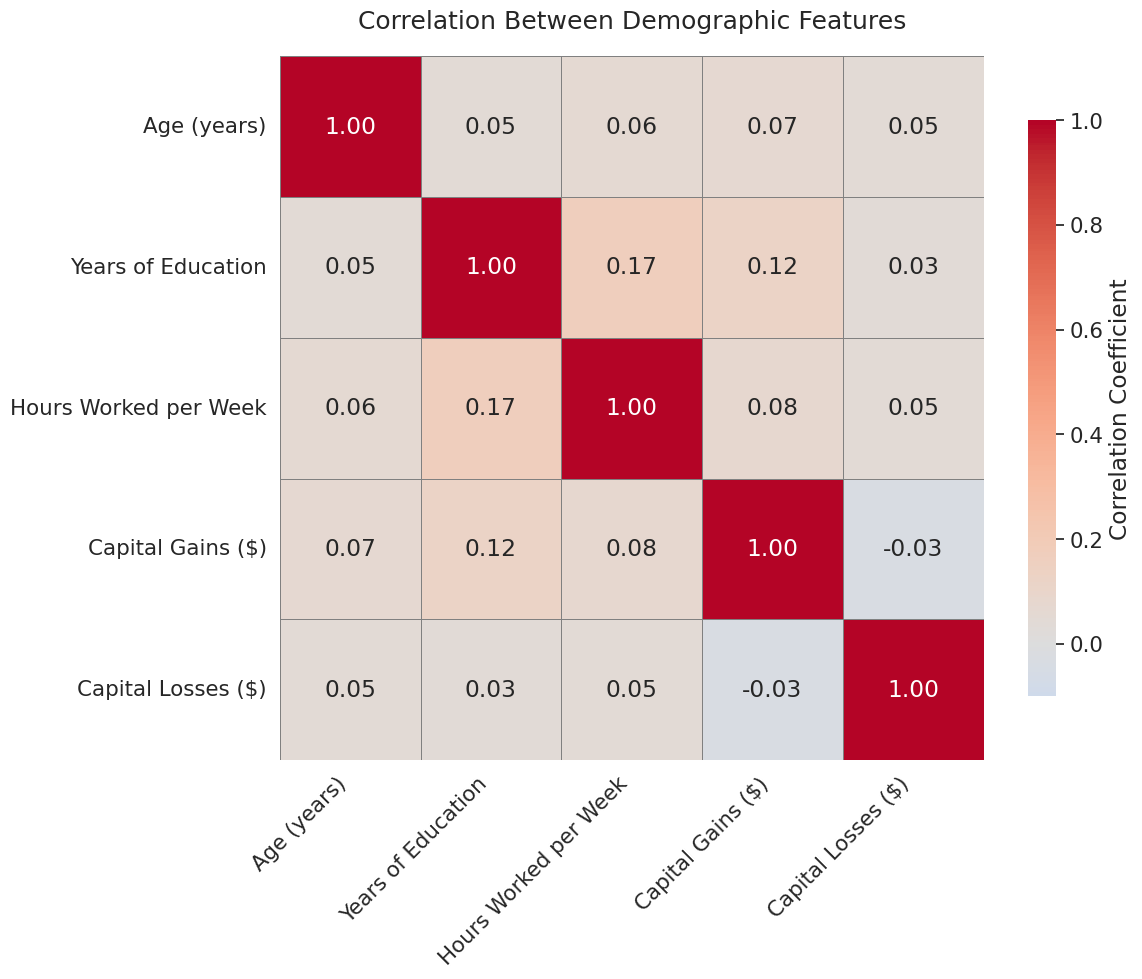

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure with larger size for better readability
plt.figure(figsize=(12, 10))

# Calculate correlation
corr = sample[["age","education_num","hours_per_week","capital_gain","capital_loss"]].corr()

# Create better labels mapping
better_labels = {
    "age": "Age (years)",
    "education_num": "Years of Education",
    "hours_per_week": "Hours Worked per Week",
    "capital_gain": "Capital Gains ($)",
    "capital_loss": "Capital Losses ($)"
}

# Rename correlation matrix index and columns
corr_renamed = corr.rename(index=better_labels, columns=better_labels)

# Increase font size for all elements
sns.set(font_scale=1.4)

# Plot with enhanced visuals
heatmap = sns.heatmap(
    corr_renamed, 
    annot=True,           # Show values in cells
    fmt='.2f',            # Format to 2 decimal places
    cmap="coolwarm",      # Keep your current colormap
    vmin=-0.1,            # Set minimum value for better color contrast
    vmax=1,               # Set maximum value
    center=0,             # Center the colormap at 0
    square=True,          # Make cells square-shaped
    linewidths=0.5,       # Add thin lines between cells
    linecolor='gray',     # Line color
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Customize colorbar
)

# Improve title and axis labels
plt.title("Correlation Between Demographic Features", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
plt.tight_layout()  # Adjust layout to fit everything

plt.show()


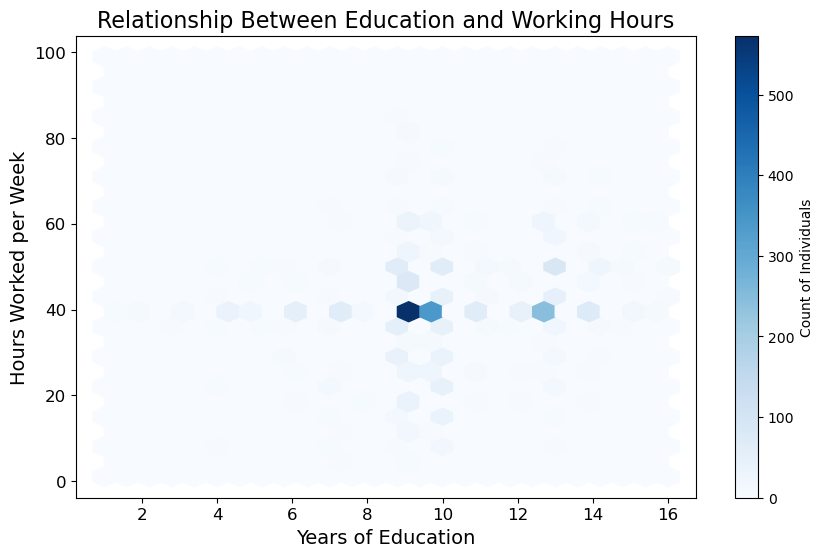

In [15]:
plt.figure(figsize=(10, 6))

plt.hexbin(sample.education_num, sample.hours_per_week, gridsize=25, cmap="Blues")
plt.colorbar(label="Count of Individuals")

# Better labels
plt.xlabel("Years of Education", size=14)
plt.ylabel("Hours Worked per Week", size=14)
plt.title("Relationship Between Education and Working Hours", size=16)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()
